In [1]:
import numpy as np
import pandas as pd

###**Carregando a base de treinamento**

In [2]:
url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Previs%C3%A3o%20de%20Pedidos%20em%20uma%20Loja%20Online/BasesTratadas/Train_Min.csv'
Train_min = pd.read_csv(url, sep=',')

url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Previs%C3%A3o%20de%20Pedidos%20em%20uma%20Loja%20Online/BasesTratadas/Train_Mean.csv'
Train_mean = pd.read_csv(url, sep=',')

url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Previs%C3%A3o%20de%20Pedidos%20em%20uma%20Loja%20Online/BasesTratadas/Train_Max.csv'
Train_max = pd.read_csv(url, sep=',')

url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Previs%C3%A3o%20de%20Pedidos%20em%20uma%20Loja%20Online/BasesTratadas/order.csv'
order = pd.read_csv(url, sep=',')



###**Carregando a base de testes**

In [3]:
url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Previs%C3%A3o%20de%20Pedidos%20em%20uma%20Loja%20Online/BasesTratadas/Test_Min.csv'
Teste_min = pd.read_csv(url, sep=',')

url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Previs%C3%A3o%20de%20Pedidos%20em%20uma%20Loja%20Online/BasesTratadas/Test_Mean.csv'
Teste_mean = pd.read_csv(url, sep=',')

url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Previs%C3%A3o%20de%20Pedidos%20em%20uma%20Loja%20Online/BasesTratadas/Test_Max.csv'
Teste_max = pd.read_csv(url, sep=',')

url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Previs%C3%A3o%20de%20Pedidos%20em%20uma%20Loja%20Online/Bases/realclass_t1.txt'
y_real = pd.read_csv(url, sep='|')

y_real = y_real.iloc[:,1]
y_real

0       1
1       1
2       1
3       0
4       0
       ..
5106    0
5107    0
5108    1
5109    0
5110    0
Name: prediction, Length: 5111, dtype: int64

#**Experimento com Redes Neurais**

importação do keras
*  Sequential
*   InputLayer,
*    Dense - Estrutura de rede totalmente conectada
*   SGD



In [ ]:
from keras.models  import Sequential
from keras.layers import InputLayer, Dense
from sklearn.metrics import accuracy_score

###**Desenvolvendo o modelo**

In [ ]:
def createNeuralModel(base, num_attr):
 
  #número de atributos preditivos 
  input_neuron = num_attr

  #neurônios da camada oculta
  hidden_neuron = 17

  #número de saídas do classificador  
  output_neuron = 1 

  mlp = Sequential([                  
      InputLayer(input_neuron),
      Dense(hidden_neuron, activation="relu"),      #Função de ativação linear Retificada para as primeiras camadas (ReLU)
      Dense(output_neuron, activation="sigmoid")    #Função de ativação sigmoide para camada de saída
  ])

  return mlp

####Criando a rede neural para o modelo min

In [ ]:
_, columns = Train_min.shape
columns
neuralModel_min = createNeuralModel(Train_min, columns)

####Criando a rede neural para o modelo mean




In [ ]:
_, columns = Train_mean.shape
neuralModel_mean = createNeuralModel(Train_mean, columns)

####Criando a rede neural para o modelo max




In [ ]:
_, columns = Train_max.shape
neuralModel_max = createNeuralModel(Train_max, columns)

###**Treinando o modelo**


In [ ]:
def separateAttrAlvo(base):
  X = base.iloc[:, :-1]
  Y = base.iloc[:, -1]
  return X, Y

In [ ]:
def compileNeuralModel(mlp):
  mlp.compile(optimizer="sgd", loss="binary_crossentropy")
  return mlp

In [ ]:
def traineNeuralModel(mlp, X_train, y_train):
  batch_size = 16
  Log = mlp.fit(X_train, y_train, batch_size=batch_size, epochs= 30)
  return  Log, mlp

####Treinando o modelo para min

In [ ]:
X_min = Train_min
y_min = order


neuralModel_min = compileNeuralModel(neuralModel_min)
neuralModel_log_min, neuralModel_min = traineNeuralModel(neuralModel_min, X_min, y_min)




Epoch 1/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4733
Epoch 2/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4090
Epoch 3/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4002
Epoch 4/30
3125/3125 [==============================] - 3s 1ms/step - loss: 0.3952
Epoch 5/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3903
Epoch 6/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3852
Epoch 7/30
3125/3125 [==============================] - 3s 1ms/step - loss: 0.3798
Epoch 8/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3736
Epoch 9/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3667
Epoch 10/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3594
Epoch 11/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3523
Epoch 12/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3451
E

####Treinando o modelo mean

In [ ]:
X_mean = Train_mean
y_mean = order

neuralModel_mean = compileNeuralModel(neuralModel_mean)
neuralModel_log_mean, neuralModel = traineNeuralModel(neuralModel_mean, X_mean, y_mean)



Epoch 1/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4483
Epoch 2/30
3125/3125 [==============================] - 3s 1ms/step - loss: 0.3158
Epoch 3/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2922
Epoch 4/30
3125/3125 [==============================] - 3s 1ms/step - loss: 0.2809
Epoch 5/30
3125/3125 [==============================] - 3s 1ms/step - loss: 0.2735
Epoch 6/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2683
Epoch 7/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2644
Epoch 8/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2615
Epoch 9/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2592
Epoch 10/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2573
Epoch 11/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2558
Epoch 12/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2546
E

####Treinando o modelo max

In [ ]:
X_max = Train_mean
y_max = order

neuralModel_max = compileNeuralModel(neuralModel_mean)
neuralModel_log_max, neuralModel_max = traineNeuralModel(neuralModel_max, X_max, y_max)

Epoch 1/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2449
Epoch 2/30
3125/3125 [==============================] - 3s 1ms/step - loss: 0.2450
Epoch 3/30
3125/3125 [==============================] - 3s 1ms/step - loss: 0.2447
Epoch 4/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2444
Epoch 5/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2443
Epoch 6/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2440
Epoch 7/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2440
Epoch 8/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2436
Epoch 9/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2435
Epoch 10/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2434
Epoch 11/30
3125/3125 [==============================] - 3s 1ms/step - loss: 0.2432
Epoch 12/30
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2431
E

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def draw_graphics(neuralModel_log):
  fig, ax = plt.subplots()
  ax.plot(neuralModel_log.history["loss"],'r', marker='.', label="Erro no treinamento")
  ax.legend();


In [ ]:
def drawGraphics_PerHistoryLogs(titles, name_axis, neuralModel_log):
  fig, axes = plt.subplots(1, 3, figsize=(20,4))

  axes[0].plot (neuralModel_log[0].history["loss"], marker='.', label="Erro no treinamento")
  axes[0].set_title(titles[0])
  #axes[0].set_xlabel(name_axis[0])
  #axes[0].set_ylabel("accuracy")
  axes[0].xaxis.labelpad = 20

  axes[1].plot (neuralModel_log[1].history["loss"],  marker='.', label="Erro no treinamento")
  axes[1].set_title(titles[1])
  #axes[1].set_xlabel(name_axis[1])
  #axes[1].set_ylabel("accuracy")
  axes[1].xaxis.labelpad = 20

  axes[2].plot(neuralModel_log[2].history["loss"],  marker='.', label="Erro no treinamento")
  axes[2].set_title(titles[2])
  #axes[2].set_xlabel(name_axis[2])
  #axes[2].set_ylabel("accuracy")
  axes[2].xaxis.labelpad = 10
  plt.show()

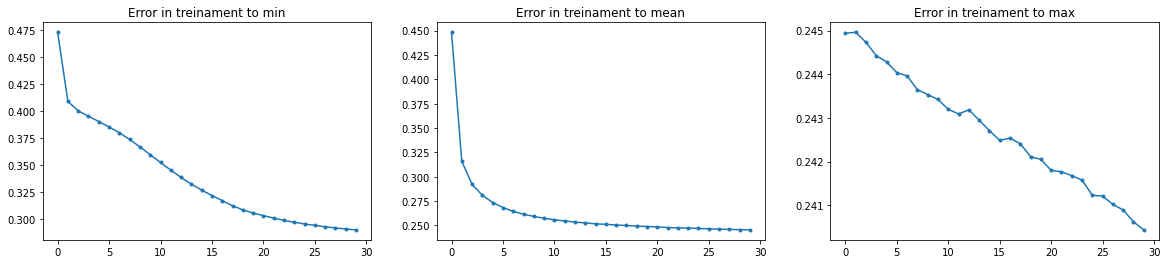

In [ ]:
neuralModel_log_min.history.keys()
drawGraphics_PerHistoryLogs(["Error in treinament to min","Error in treinament to mean", "Error in treinament to max"],
                            ["Min", "Mean", "Max"],
                            [neuralModel_log_min, neuralModel_log_mean, neuralModel_log_max])


###**Predição**

In [ ]:
def prediction(neuralModel, base):
  y_pred = neuralModel.predict(base)
  return y_pred

def prediction_bin(neuralModel, base):
  y_pred = neuralModel.predict(base)
  return (y_pred > 0.5).astype("int32")

In [ ]:
def drawGraphicsPerMissingValuesTreatment(axis, accuracy):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(axis, accuracy)
  ax.set_ylabel('Accuracy')
  ax.set_title('Acurracy per missing values treatment')
  plt.show()

####Visualização do erro para o modelo min

In [ ]:
y_pred_bin_min = prediction_bin(neuralModel_min, Teste_min)
accuracy_min = accuracy_score(y_real, y_pred_bin_min)
accuracy_min

0.844648796712972

####Visualização do erro para o modelo mean



In [ ]:
y_pred_bin_mean = prediction_bin(neuralModel_mean, Teste_mean)
accuracy_mean = accuracy_score(y_real, y_pred_bin_mean)
accuracy_mean

0.8659753472901585

####Visualização do erro para o modelo max



In [ ]:
y_pred_bin_max = prediction_bin(neuralModel_max, Teste_max)
accuracy_max = accuracy_score(y_real, y_pred_bin_max)
accuracy_max

0.6214048131481119

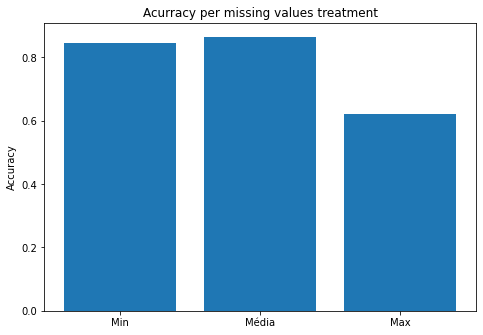

In [ ]:
drawGraphicsPerMissingValuesTreatment(['Min', 'Média', 'Max'], [accuracy_min, accuracy_mean, accuracy_max])

#**Experimento com Random Forest**

**Importando o classificador Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
def classifierRandomForest(X_train, y_train):

  classificador_RF = RandomForestClassifier(n_estimators=100)
  classificador_RF.fit(X_train, y_train)
  return classificador_RF


In [ ]:
def predictRandomForest(classificador_RF, X_test): 
  return classificador_RF.predict(X_test)

In [ ]:
def drawGraphicsAccuracyRandomForest(axis, accuracy):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(axis, accuracy)
  ax.set_ylabel('Accuracy')
  ax.set_title('Acurracy per missing values treatment')
  plt.show()

###**Treinando o modelo para max**

In [ ]:
X_train_max = Train_max
classificador_RF = classifierRandomForest(X_train_max,np.ravel(order))
y_predict_max = predictRandomForest(classificador_RF, Teste_max)

In [ ]:
accuracy_min = accuracy_score(y_real, y_predict_max)
accuracy_max

0.6214048131481119

####Treinamento o modelo para mean

In [ ]:
X_train_mean = Train_mean
classificador_RF = classifierRandomForest(X_train_mean, np.ravel(order))
y_predict_mean = predictRandomForest(classificador_RF, Teste_mean)

In [ ]:
accuracy_mean = accuracy_score(y_real, y_predict_mean)
accuracy_mean

0.9598904324007044

####Treinando o modelo para min

In [ ]:
X_train_min = Train_min
classificador_RF = classifierRandomForest(X_train_min, np.ravel(order))
y_predict_min = predictRandomForest(classificador_RF, Teste_min)

In [ ]:
accuracy_min = accuracy_score(y_real, y_predict_min)
accuracy_min

0.9029544120524359

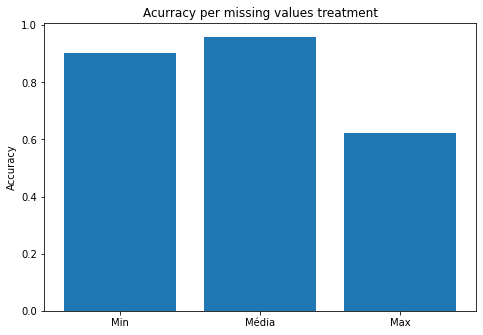

In [ ]:
drawGraphicsAccuracyRandomForest(['Min', 'Média', 'Max'], [accuracy_min, accuracy_mean, accuracy_max])
